Задача заключается в прогнозировании веса рыбы по ее параметрам(вид, длина, высота, ширина и прочее
)

In [3]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [4]:
path = "fish_train.csv"
fish_data = pd.read_csv(path)
fish_data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Roach,150.0,20.4,22.0,24.7,5.8045,3.7544
1,Perch,250.0,25.4,27.5,28.9,7.2828,4.5662
2,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
3,Bream,925.0,36.2,39.5,45.3,18.7542,6.7497
4,Perch,110.0,19.0,21.0,22.5,5.6925,3.5550
...,...,...,...,...,...,...,...
114,Parkki,273.0,23.0,25.0,28.0,11.0880,4.1440
115,Pike,500.0,42.0,45.0,48.0,6.9600,4.8960
116,Whitefish,1000.0,37.3,40.0,43.5,12.3540,6.5250
117,Perch,120.0,20.0,22.0,23.5,6.1100,3.4075


Линейные модели достаточно плохо реагируют на коррелированные признаки
Построим матрицу корреляции, для нахождения и дальнейшей обработки наиболее коррелированных признаков

In [14]:
fish_data.drop(columns = ["Species"]).corr() # отбросили нечисловой признак "Species" 

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.897306,0.900856,0.907401,0.745870,0.896493
Length1,0.897306,1.000000,0.999457,0.991043,0.621868,0.862072
Length2,0.900856,0.999457,1.000000,0.993469,0.638003,0.868714
Length3,0.907401,0.991043,0.993469,1.000000,0.704594,0.872468
Height,0.745870,0.621868,0.638003,0.704594,1.000000,0.783475
Width,0.896493,0.862072,0.868714,0.872468,0.783475,1.000000


Применим PCA к трем наиболее коррелированным признакам

In [25]:
pca = PCA(n_components=1, svd_solver='full')
xpca = pca.fit_transform(fish_data [['Length1', 'Length2', 'Length3']])
print(pca.explained_variance_ratio_) # доля объясненной дисперсии при использовании только первой главной компоненты

[0.99627616]


In [26]:
new_data = fish_data.drop(columns = ["Length1", "Length2", "Length3"])
new_data["Length"] = xpca

Построим зависимости массы рыбы от параметров

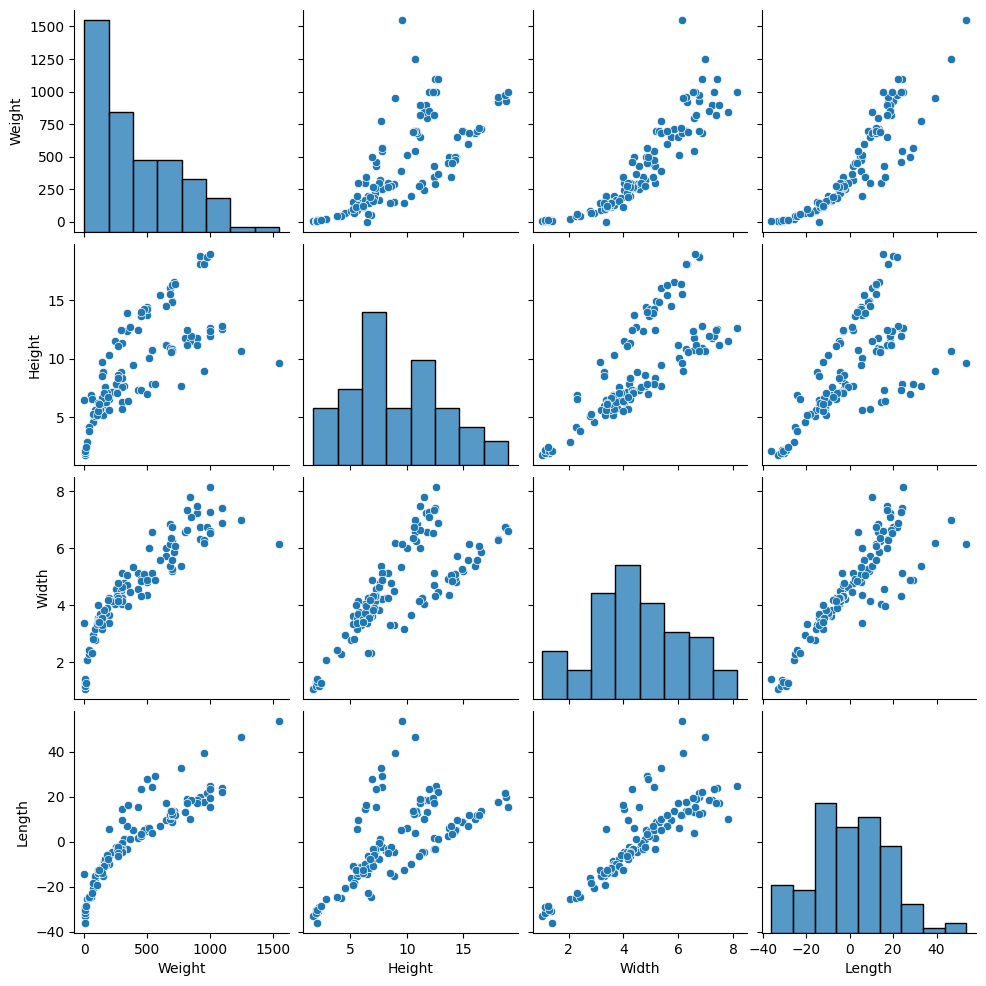

In [28]:
sns.pairplot(new_data.drop(columns =["Species"]))

Разобьём данные на обучающую и тестовую выборку

In [27]:
train, test = train_test_split(new_data,
                test_size=0.2,
                train_size=0.8,
                random_state=1,
                shuffle=True,
                stratify=fish_data["Species"])